In [10]:
import numpy as np
from scipy import integrate
from scipy.misc import derivative
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [11]:
def linear_combination_function(coefficients, basis_functions):
    def combined_function(x):
        return sum(c * f(x) for c, f in zip(coefficients, basis_functions))
    return combined_function

def trapezoidal_rule(func, x_inicial, x_final, num_points):
    x = np.linspace(x_inicial, x_final, num_points)
    y = func(x)
    h = (x_final - x_inicial) / (num_points - 1)
    integral = (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])
    return integral

def gaussian_quad(func, x_inicial, x_final, args=None):
    def_integral = integrate.quad(func, x_inicial, x_final)[0]
    return def_integral

def galerkin_method(basis_functions, fonte, funcionais, x_inicial, x_final, integration_method, args=None):
    #args = num_partitions caso integration_method == trapezoidal_rule]
    n = len(basis_functions)
    A = np.zeros((n, n))
    l = np.zeros(n) 

    funcional_incognita = funcionais['funcional_incognita']    
    funcional_fonte = funcionais['funcional_fonte']
    
    for i in range(n):
        for j in range(n):
            A[i, j] = funcional_incognita(basis_functions[i], basis_functions[j], integration_method, x_inicial, x_final, args)
            
        l[i] = funcional_fonte(basis_functions[i], fonte, integration_method, x_inicial, x_final, args)

    coef = np.linalg.solve(A, l)
    return coef

def plot_sol(X, sol_aproximada, sol_analitical):
    
    err = lambda x: sol_analitica(x) - sol_aproximada(x)
    
    plt.figure(figsize=(15,6))
    plt.plot(X, sol_aproximada(X), label="solução aproximada", linestyle='-', color='b')
    plt.plot(X, sol_analitica(X), label="solução analítica", linestyle='-', color='r')
    plt.plot(X, err(X), label="Erro", linestyle='--')
    plt.ylabel("y")
    plt.xlabel("x")
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)
    plt.title("Comparação entre a solução aproximada e a analítica")
    
    plt.savefig("C:\\Users\\Usuario\\OneDrive\\Documents\\UNICAMP\\MS712\\imagens\\last_image.png")
    plt.show()


    err_rel = np.sqrt( integrate.simpson(err(X)**2) / integrate.simpson(sol_analitica(X)**2) )
    print(f'Erro relativo: {err_rel}')

### Poisson:

$$-u^{"}(x) = f(x), \quad \text{com} \quad u(x_{inicial})=u(x_{final})=0.$$

In [12]:
def funcional_incognita_Poisson(func1, func2, integration_method, x_inicial, x_final, args):
    integrand = lambda x: derivative(func1, x, dx=1e-4) * derivative(func2, x, dx=1e-4)
    return integration_method(integrand, x_inicial, x_final, args)

def funcional_fonte_Poisson(func, fonte, integration_method, x_inicial, x_final, args):
    integrand = lambda x: func(x) * fonte(x)
    return integration_method(integrand, x_inicial, x_final, args)

funcionais_Poisson = {'funcional_incognita': funcional_incognita_Poisson, 'funcional_fonte': funcional_fonte_Poisson}

In [13]:
x_inicial = 0
x_final = 1

basis_func_1 = lambda x: np.sin(np.pi * x) / (np.pi)**2 
basis_func_2 = lambda x: x*(x-1)
basis_func_3 = lambda x: x*(x-1)**2
basis_func_4 = lambda x: (x**2)*(x-1)

basis_functions = [basis_func_1, basis_func_2, basis_func_3, basis_func_4]

f = lambda x: np.sin(np.pi * x)

sol_analitica = lambda x: np.sin(np.pi * x) / (np.pi)**2 

Coordenadas da base: [   1.00000115  364.03191214  364.0319117  -364.0319117 ]


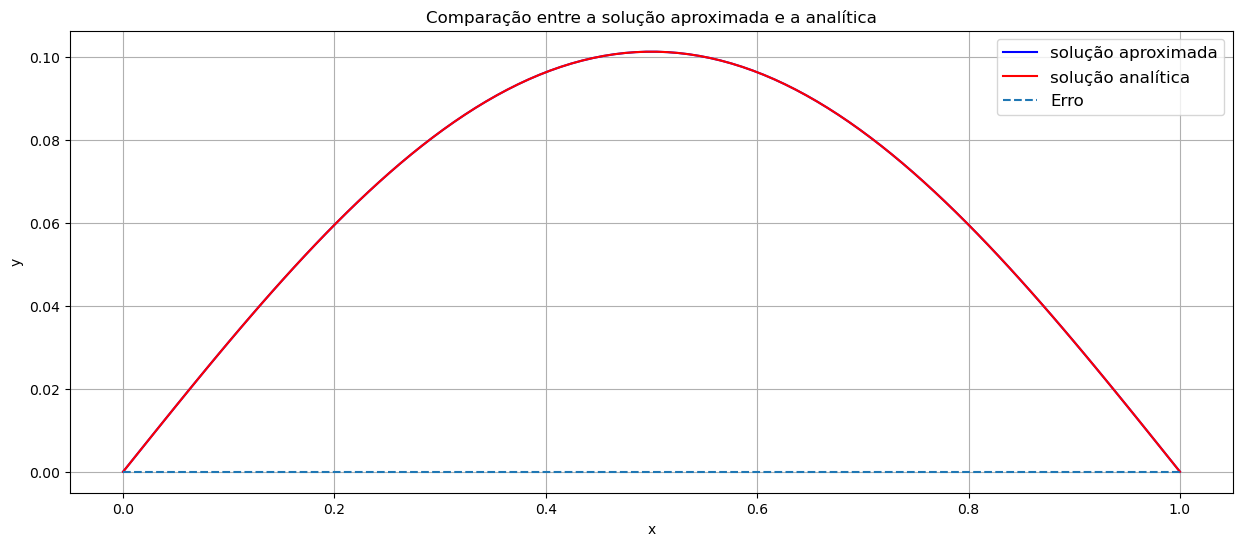

Erro relativo: 5.388224828966702e-08


In [14]:
coef_gaussian = galerkin_method(basis_functions, f, funcionais_Poisson, x_inicial, x_final, gaussian_quad)
sol_aproximada = linear_combination_function(coef_gaussian, basis_functions)
print(f"Coordenadas da base: {coef_gaussian}")

X = np.linspace(0,1,100)
plot_sol(X, sol_aproximada, sol_analitica)

### Exercício 1: 

Problema $V$: Encontrar $u \in \mathbb{V}$ tal que

\begin{equation}
\int_0^1[u'v'+uv]\text{dx} = \int_0^1xv\text{dx}, \quad \forall v \in \mathbb{V}
\end{equation}

onde $\mathbb{V}$ é o espaço das funções diferenciáveis que satisfazem $v(0) = v(1) = 0$.

In [15]:
def funcional_incognita_1(func1, func2, integration_method, x_inicial, x_final, args):
    integrand = lambda x: derivative(func1, x, dx=1e-4) * derivative(func2, x, dx=1e-4) + func1(x)*func2(x)
    return integration_method(integrand, x_inicial, x_final, args)

def funcional_fonte_1(func, fonte, integration_method, x_inicial, x_final, args):
    integrand = lambda x: func(x) * fonte(x)
    return integration_method(integrand, x_inicial, x_final, args)

funcionais_1 = {'funcional_incognita': funcional_incognita_1, 'funcional_fonte': funcional_fonte_1}

In [56]:
coef_1_3 = coef_gaussian

Coordenadas da base: [-0.14964831 -0.14405769 -0.01873301]


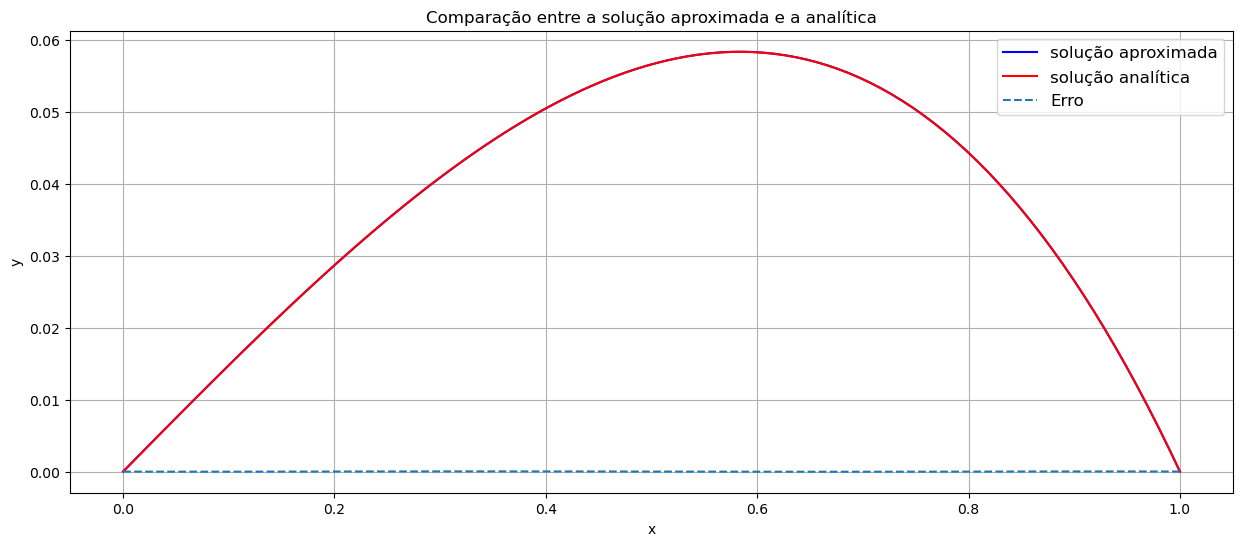

Erro relativo: 0.0003692196757500652


In [55]:
x_inicial = 0
x_final = 1

basis_func_1 = lambda x: x*(x-1)
basis_func_2 = lambda x: (x**2)*(x-1)
basis_func_3 = lambda x: (x**3)*(x-1)

basis_functions = [basis_func_1, basis_func_2, basis_func_3]

f = lambda x: x

sol_analitica  = lambda x: x - np.sinh(x)/np.sinh(1)

coef_gaussian = galerkin_method(basis_functions, f, funcionais_1, x_inicial, x_final, gaussian_quad)
sol_aproximada = linear_combination_function(coef_gaussian, basis_functions)
print(f"Coordenadas da base: {coef_gaussian}")

X = np.linspace(0,1,100)
plot_sol(X, sol_aproximada, sol_analitica)

### Exercício 2:

\begin{equation}
\phi_i(x) = \sin{(i\pi x)}
\end{equation}

In [30]:
def galerkin_method_2(basis_functions, fonte, funcional_fonte, x_inicial, x_final, integration_method, args=None):
    #args = num_partitions caso integration_method == trapezoidal_rule]
    n = len(basis_functions)
    A = np.zeros((n, n))
    l = np.zeros(n) 
    
    for i in range(n):
        for j in range(n):
            if i == j:
                A[i,j] = (i+1)**2 * np.pi**2
            else:
                A[i,j] = 0
            
        l[i] = funcional_fonte(basis_functions[i], fonte, integration_method, x_inicial, x_final, args)
        
    coef = np.linalg.solve(A, l)
    return coef

In [78]:
coef_2_3 = coef_gaussian

Coordenadas da base: [ 0.03225153 -0.00403144  0.0011945 ]


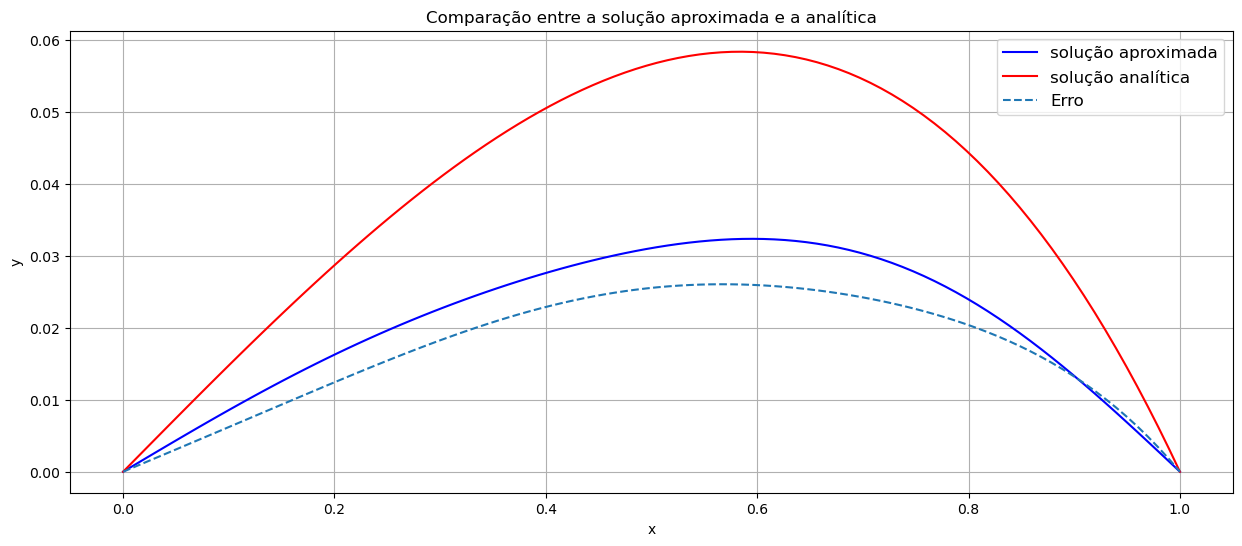

Erro relativo: 0.4504751649657195


In [77]:
x_inicial = 0
x_final = 1

basis_func_1 = lambda x: np.sin(1* np.pi * x)
basis_func_2 = lambda x: np.sin(2* np.pi * x)
basis_func_3 = lambda x: np.sin(3* np.pi * x)

basis_functions = [basis_func_1, basis_func_2, basis_func_3]

f = lambda x: x

sol_analitica = lambda x: x - np.sinh(x)/np.sinh(1)

coef_gaussian = galerkin_method_2(basis_functions, f, funcional_fonte_1, x_inicial, x_final, gaussian_quad)
sol_aproximada = linear_combination_function(coef_gaussian, basis_functions)
print(f"Coordenadas da base: {coef_gaussian}")

X = np.linspace(0,1,100)
plot_sol(X, sol_aproximada, sol_analitica)

### Exercício 3:

In [ ]:
# Para exercício 1:
basis_func_1 = lambda x: x*(x-1)
basis_func_2 = lambda x: (x**2)*(x-1)
basis_func_3 = lambda x: (x**3)*(x-1)

basis_functions = [basis_func_1, basis_func_2, basis_func_3]

sol_aprox_1_1 = linear_combination_function(coef_1_1, [basis_func_1])
sol_aprox_1_2 = linear_combination_function(coef_1_2, [basis_func_1, basis_func_2])
sol_aprox_1_3 = linear_combination_function(coef_1_3, [basis_func_1, basis_func_2, basis_func_3])

plt.figure(figsize=(15,6))

plt.plot(X, np.gradient(sol_aprox_1_1(X)), label='n=1')
plt.plot(X, np.gradient(sol_aprox_1_2(X)), label='n=2')
plt.plot(X, np.gradient(sol_aprox_1_3(X)), label='n=3')
plt.plot(X, np.gradient(sol_analitica(X)), label='solução analítica', linestyle='--')
plt.legend()
plt.grid(True)

plt.savefig("C:\\Users\\Usuario\\OneDrive\\Documents\\UNICAMP\\MS712\\imagens\\last_image.png")
plt.show()

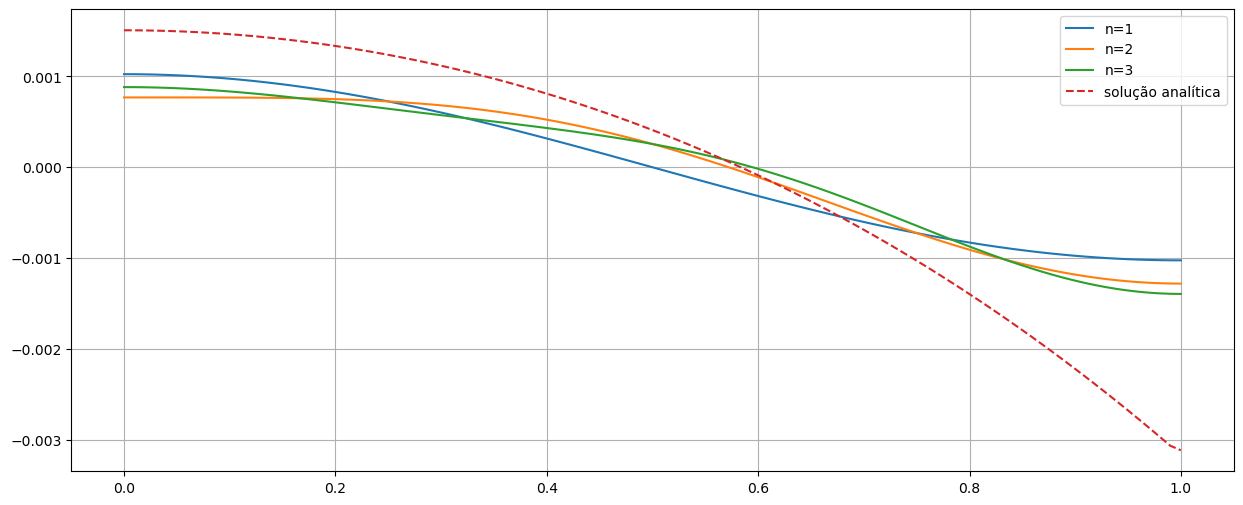

In [82]:
# Para exercício 2:
basis_func_1 = lambda x: np.sin(1* np.pi * x)
basis_func_2 = lambda x: np.sin(2* np.pi * x)
basis_func_3 = lambda x: np.sin(3* np.pi * x)

basis_functions = [basis_func_1, basis_func_2, basis_func_3]

sol_aprox_2_1 = linear_combination_function(coef_2_1, [basis_func_1])
sol_aprox_2_2 = linear_combination_function(coef_2_2, [basis_func_1, basis_func_2])
sol_aprox_2_3 = linear_combination_function(coef_2_3, [basis_func_1, basis_func_2, basis_func_3])

plt.figure(figsize=(15,6))

plt.plot(X, np.gradient(sol_aprox_2_1(X)), label='n=1')
plt.plot(X, np.gradient(sol_aprox_2_2(X)), label='n=2')
plt.plot(X, np.gradient(sol_aprox_2_3(X)), label='n=3')
plt.plot(X, np.gradient(sol_analitica(X)), label='solução analítica', linestyle='--')
plt.legend()
plt.grid(True)

plt.savefig("C:\\Users\\Usuario\\OneDrive\\Documents\\UNICAMP\\MS712\\imagens\\last_image.png")
plt.show()